In [2]:
import anndata as ad
import pandas as pd 
import numpy as np
import scanpy as sc
from scipy.sparse import csr_matrix
import PyWGCNA as PyWGCNA
from matplotlib import pyplot as plt
import seaborn as sns
import decoupler as dc

In [3]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
custom_colors = ['#e8ba41', '#b1a73e', '#b93c6d', '#b4d6e7']

## Preprocess Data

### Tcell Exhaustion (Khan et al.)

In [84]:
adata = sc.read_h5ad('../../data/Tcell_exhaustion/adata_prc.h5ad')
sampleInfo = pd.read_csv('../../data/Tcell_exhaustion/metadata.txt', sep='\t', index_col=0)
degs = pd.read_csv('../../data/Tcell_exhaustion/DEGs_ko.txt', sep='\t', index_col=0, header=None)

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)


In [87]:
# Subset adata by genes in degs
adata_subset = adata[:, adata.var_names.isin(degs.index)].copy()

In [85]:

geneInfo = pd.DataFrame(adata_subset.var_names)
geneInfo.columns = ['gene_name']
geneInfo.index = adata_subset.var_names

In [124]:
ouput = '../../data/Tcell_exhaustion/WGCNA'

pyWGCNA = PyWGCNA.WGCNA(name='Tcell_exhaustion', 
                              species='mus musculus', 
                              anndata=adata_subset, 
                              geneInfo=geneInfo,
                              sampleInfo=sampleInfo,
                              MeanCut=200,
                              TPMcutoff=2,
                              MEDissThres=0.1,
                              powers=[30, 32, 34, 36, 38, 40, 42, 44],                              
                              networkType='unsigned',
                              outputPath=ouput,
                              save=True,
                              minModuleSize=10)

Saving data to be True, checking requirements ...


Pre-processing...
	Detecting genes and samples with too many missing values...


	Done pre-processing..



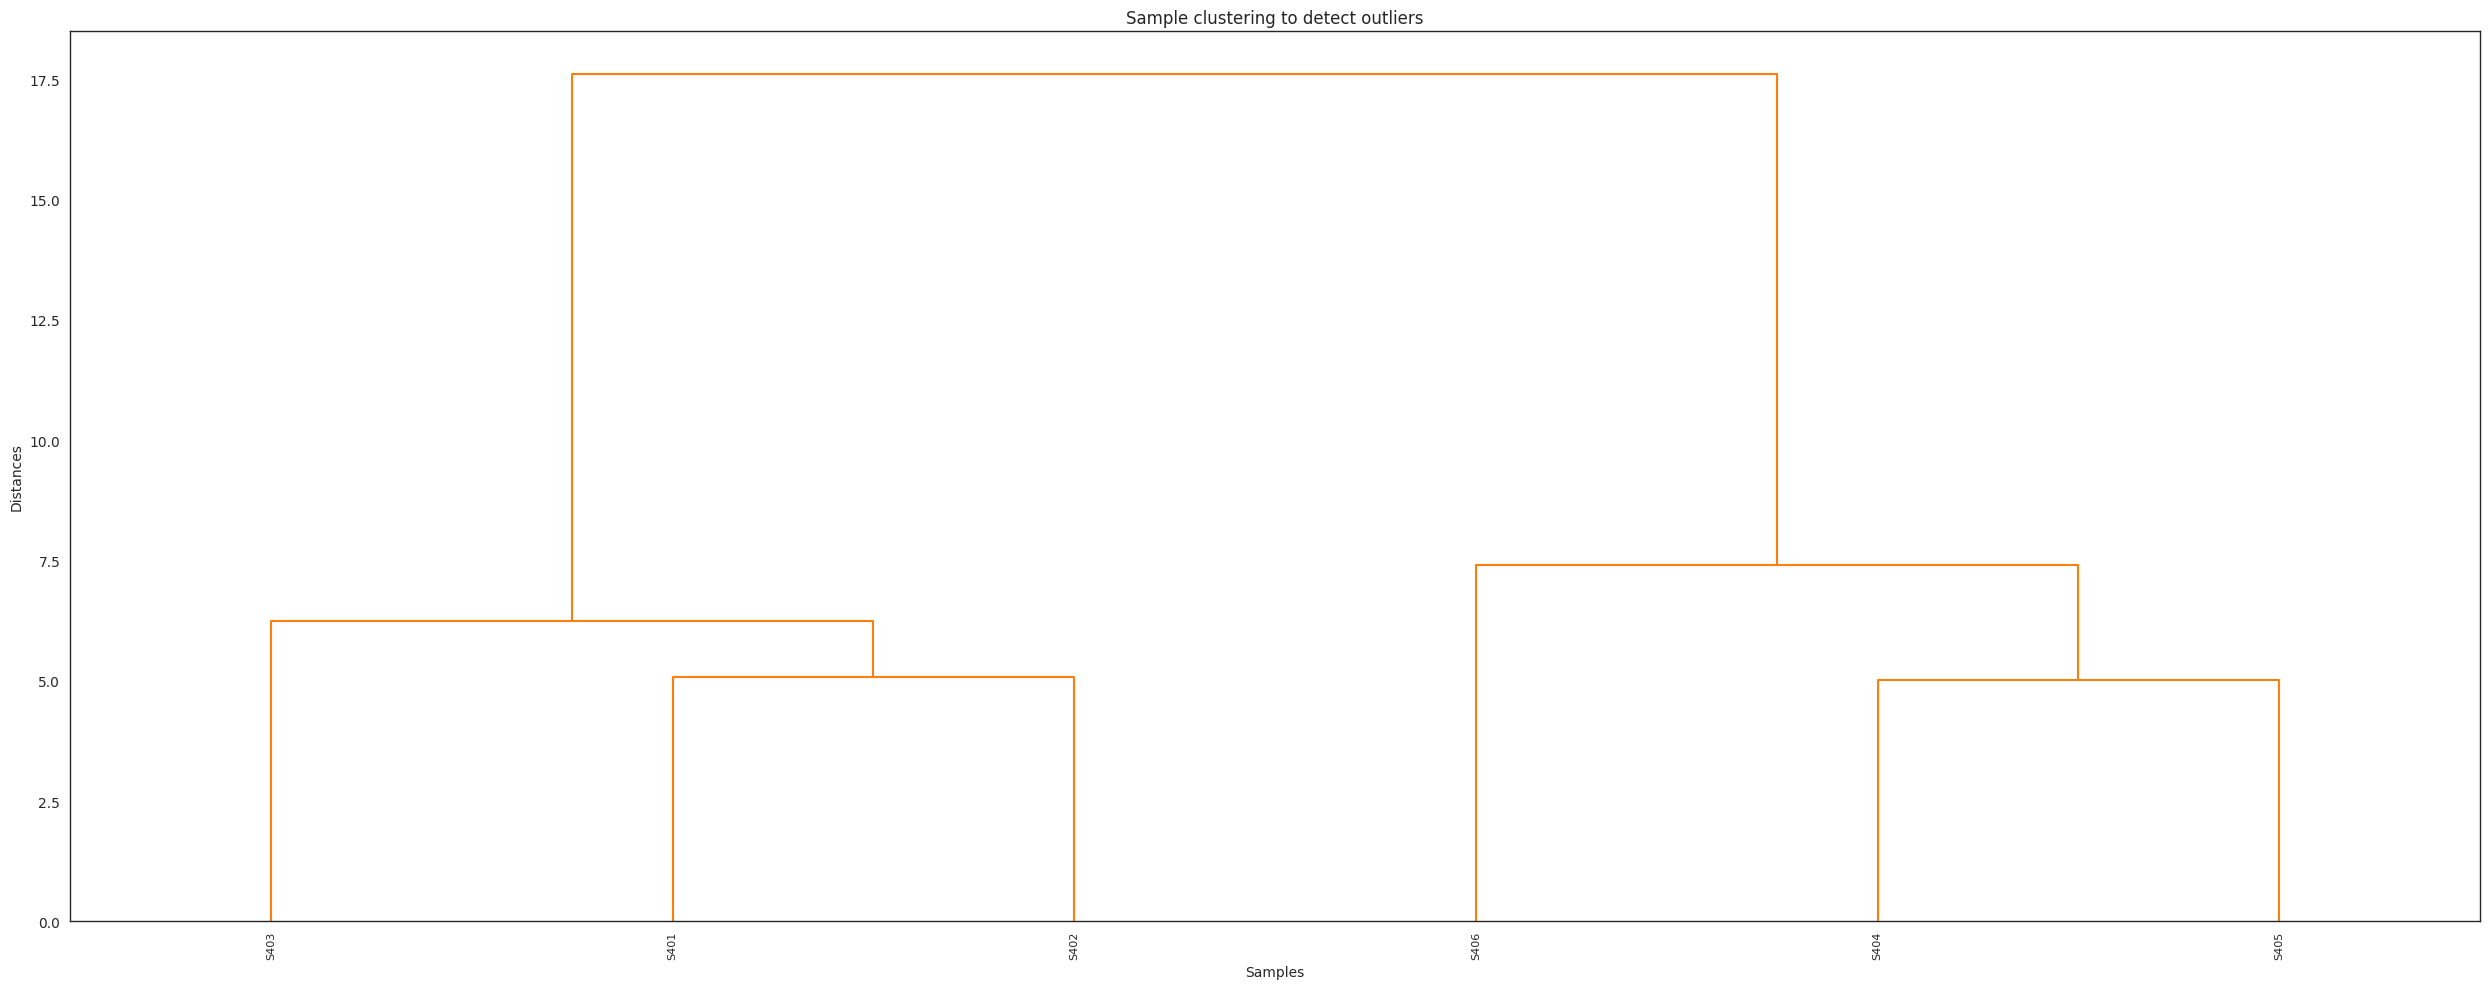

In [125]:
pyWGCNA.preprocess()

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  1243
   Power  SFT.R.sq     slope truncated R.sq     mean(k)   median(k)  \
0     30  0.294349 -0.240858       0.793741  124.710641  118.602775   
1     32  0.380409 -0.286743       0.801139  114.784454  108.388804   
2     34   0.46081  -0.32384       0.857693  106.027947   99.136251   
3     36  0.504967  -0.36484       0.830764   98.260939   91.112225   
4     38  0.555516 -0.390712       0.889691    91.33713   83.926216   
5     40  0.568707 -0.416262       0.886857   85.136651   77.477006   
6     42  0.605717  -0.44709       0.888543   79.560475   71.673975   
7     44  0.644235 -0.481073        0.90161   74.526174   66.628974   

       max(k)  
0  285.326984  
1  268.444851  
2  253.151606  
3   239.24502  
4   226.90359  
5  215.666457  
6  205.321797  
7  195.771811  
No power detected to have scale free network!
Found the best given power which is 44.
calculating adjacency matri

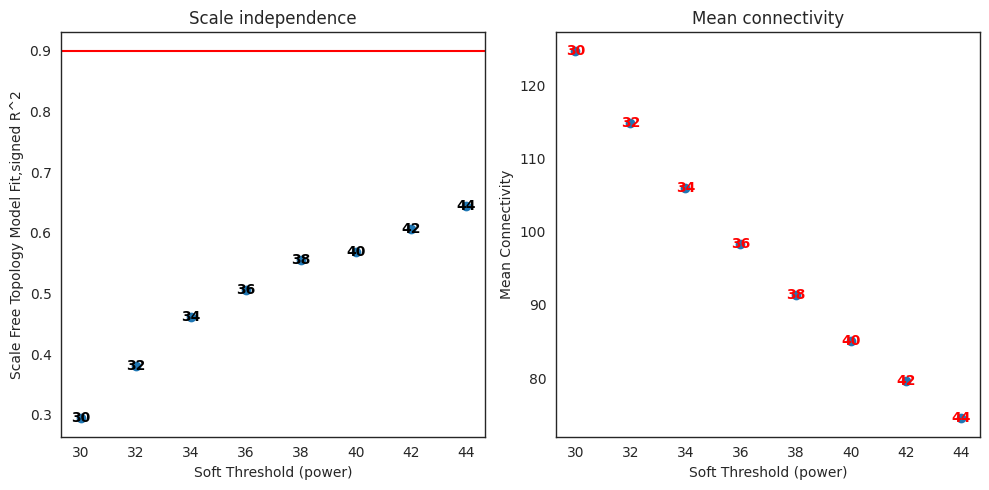

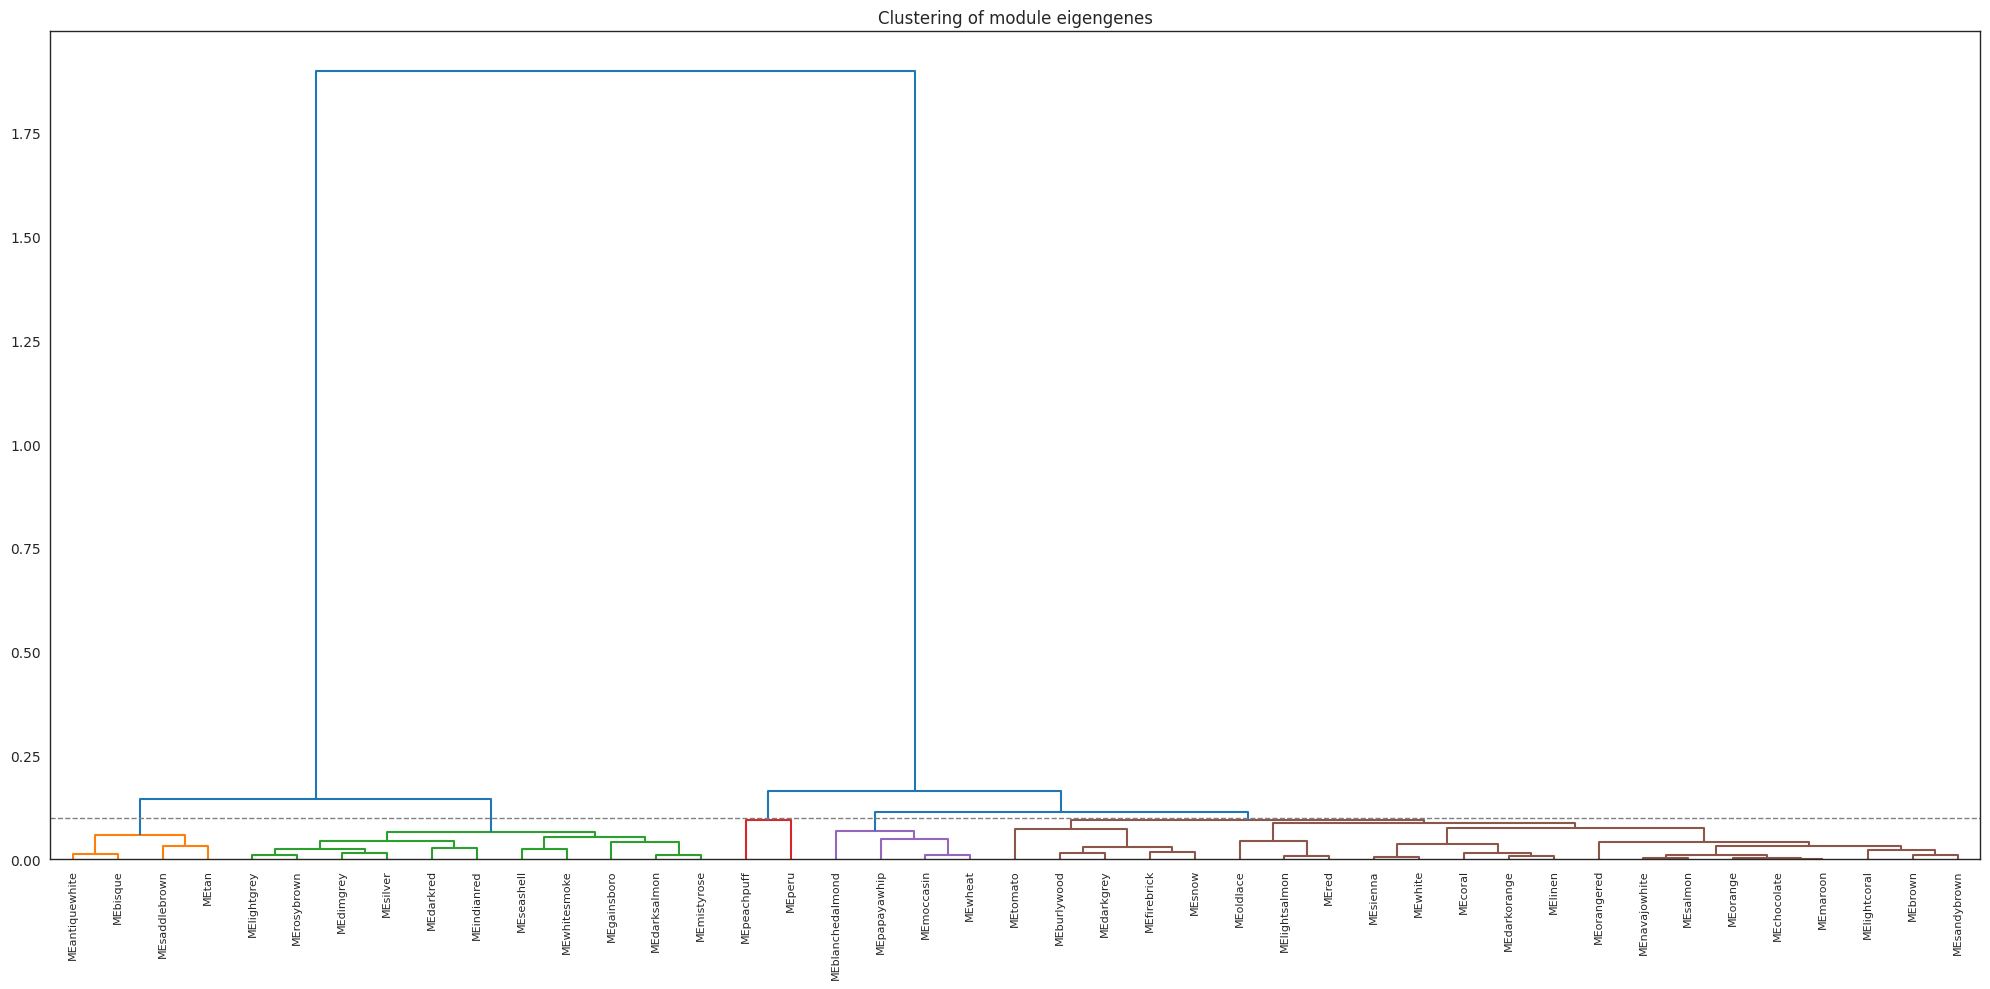

In [126]:
pyWGCNA.findModules()

In [129]:
pyWGCNA.updateGeneInfo(geneInfo)

In [107]:
# Get modules
modules = pyWGCNA.datExpr.var.moduleColors.unique().tolist()

In [130]:




# Perform functional enrichment analysis
pyWGCNA.figureType = "pdf"

for m in modules:
    pyWGCNA.functional_enrichment_analysis(type="REACTOME",
                                                moduleName=m,
                                                p_value=0.05)
    
# Save WGCNA object    
pyWGCNA.saveWGCNA()

REACTOME directory does not exist!
Creating REACTOME directory!
352 out of 519 genes (identifiers) in the sample were found in Reactome.
5858 pathways were hit by at least one of them, which 1 of them have p-value less than 0.05.
Report was saved ../../data/Tcell_exhaustion/WGCNAfigures/REACTOME/dimgrey.pdf!
For more information please visit https://reactome.org/PathwayBrowser/#/DTAB=AN&ANALYSIS=MjAyNTAzMDYxMjQyMjJfMTEwMzA%3D
411 out of 633 genes (identifiers) in the sample were found in Reactome.
7095 pathways were hit by at least one of them, which 0 of them have p-value less than 0.05.
Report was saved ../../data/Tcell_exhaustion/WGCNAfigures/REACTOME/blanchedalmond.pdf!
For more information please visit https://reactome.org/PathwayBrowser/#/DTAB=AN&ANALYSIS=MjAyNTAzMDYxMjQyNDRfMTEwMzE%3D
16 out of 34 genes (identifiers) in the sample were found in Reactome.
525 pathways were hit by at least one of them, which 0 of them have p-value less than 0.05.
Report was saved ../../data/Tcell_

In [3]:
path = '../../data/Tcell_exhaustion/WGCNA_degs/'

In [4]:
pyWGCNA = PyWGCNA.utils.readWGCNA(path + 'WGCNATcell_exhaustion_degs.p')

Reading Tcell_exhaustion WGCNA done!


In [6]:
pyWGCNA.setMetadataColor('group', cmap='tab20')

dimgrey = pyWGCNA.top_n_hub_genes(moduleName="dimgrey", n=1000)
peachpuff = pyWGCNA.top_n_hub_genes(moduleName="peachpuff", n=1000)
blanchedalmond = pyWGCNA.top_n_hub_genes(moduleName="blanchedalmond", n=1000)
saddlebrown = pyWGCNA.top_n_hub_genes(moduleName="saddlebrown", n=1000)

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..



In [8]:
dimgrey.columns = ['gene_name']
peachpuff.columns = ['gene_name']
blanchedalmond.columns = ['gene_name']
saddlebrown.columns = ['gene_name']

dimgrey['gene_name'].to_csv('../../data/Tcell_exhaustion/WGCNA_degs/dimgrey.txt', index=False, header=False)
peachpuff['gene_name'].to_csv('../../data/Tcell_exhaustion/WGCNA_degs/peachpuff.txt', index=False, header=False)
blanchedalmond['gene_name'].to_csv('../../data/Tcell_exhaustion/WGCNA_degs/blanchedalmond.txt', index=False, header=False)
saddlebrown['gene_name'].to_csv('../../data/Tcell_exhaustion/WGCNA_degs/saddlebrown.txt', index=False, header=False)


## SLE

In [6]:
adata = sc.read_h5ad('../../data/SLE/SLE_adata_prc.h5ad')


In [10]:
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)

In [14]:
DEGs = pd.read_csv('../../data/SLE/DEGs_SLE.txt', sep='\t', index_col=0, header=None)

In [16]:
# Subset adata by genes in degs
adata_subset = adata[:, adata.var_names.isin(DEGs.index)].copy()

In [19]:
geneInfo = pd.DataFrame(adata_subset.var_names)
geneInfo.columns = ['gene_name']
geneInfo.index = adata_subset.var_names

In [20]:
sampleInfo = pd.read_csv('../../data/SLE/metadata.txt', sep='\t', index_col=0)

In [63]:
ouput = '../../data/SLE/WGCNA'

pyWGCNA = PyWGCNA.WGCNA(name='SLE', 
                              species='homo sapiens', 
                              anndata=adata_subset, 
                              geneInfo=geneInfo,
                              sampleInfo=sampleInfo,
                              MeanCut=250,
                              TPMcutoff=2,
                              MEDissThres=0.24,
                              powers=[40,44,48,52,56,60,64],                              
                              networkType='unsigned',
                              outputPath=ouput,
                              save=True,
                              minModuleSize=10)

Saving data to be True, checking requirements ...


Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



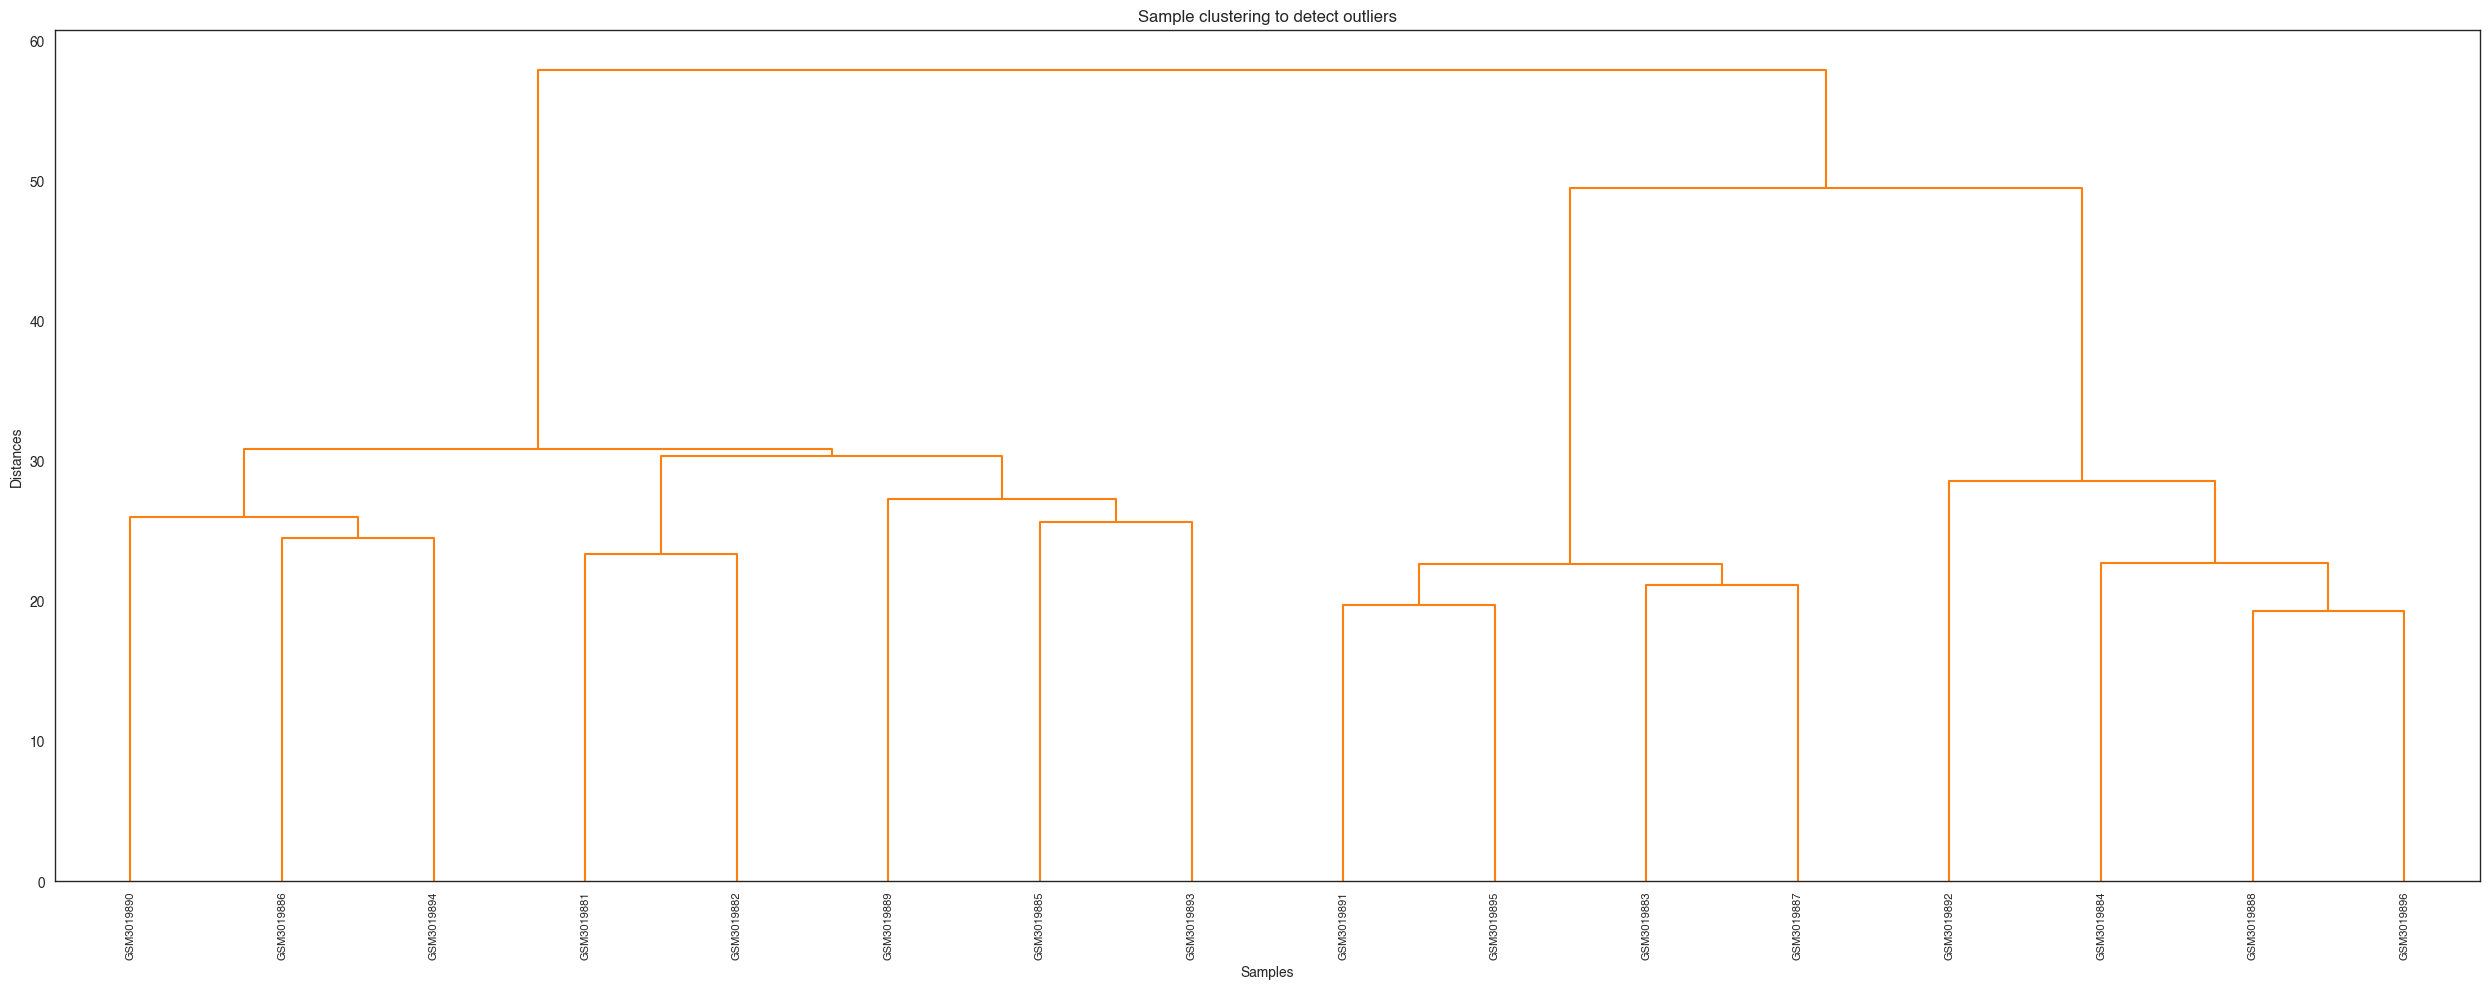

In [64]:
pyWGCNA.preprocess()

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  1654
   Power  SFT.R.sq     slope truncated R.sq   mean(k) median(k)     max(k)
0     40  0.867172 -1.382048       0.957939  4.553769  1.759935  33.874514
1     44   0.88251 -1.430626        0.98316  3.563445  1.279648  29.211422
2     48  0.886616 -1.481107       0.984151   2.83568  0.964435  25.454068
3     52  0.884631 -1.522434       0.987211  2.289583  0.718723  22.375026
4     56  0.866945 -1.586471       0.969789   1.87236  0.546523  19.815342
5     60  0.877231 -1.604578       0.982316  1.548551  0.430701   17.66098
6     64    0.8641 -1.641094       0.981134  1.293738  0.332212  15.828254
No power detected to have scale free network!
Found the best given power which is 48.
calculating adjacency matrix ...
	Done..

calculating TOM similarity matrix ...
	Done..

Going through the merge tree...
..cutHeight not given, setting it to 0.998  ===>  99% of the (truncated) height range in d

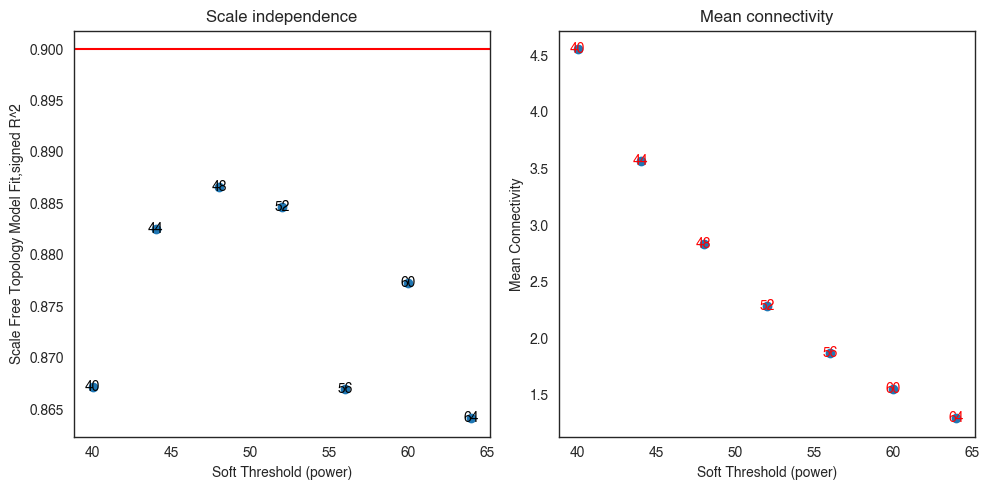

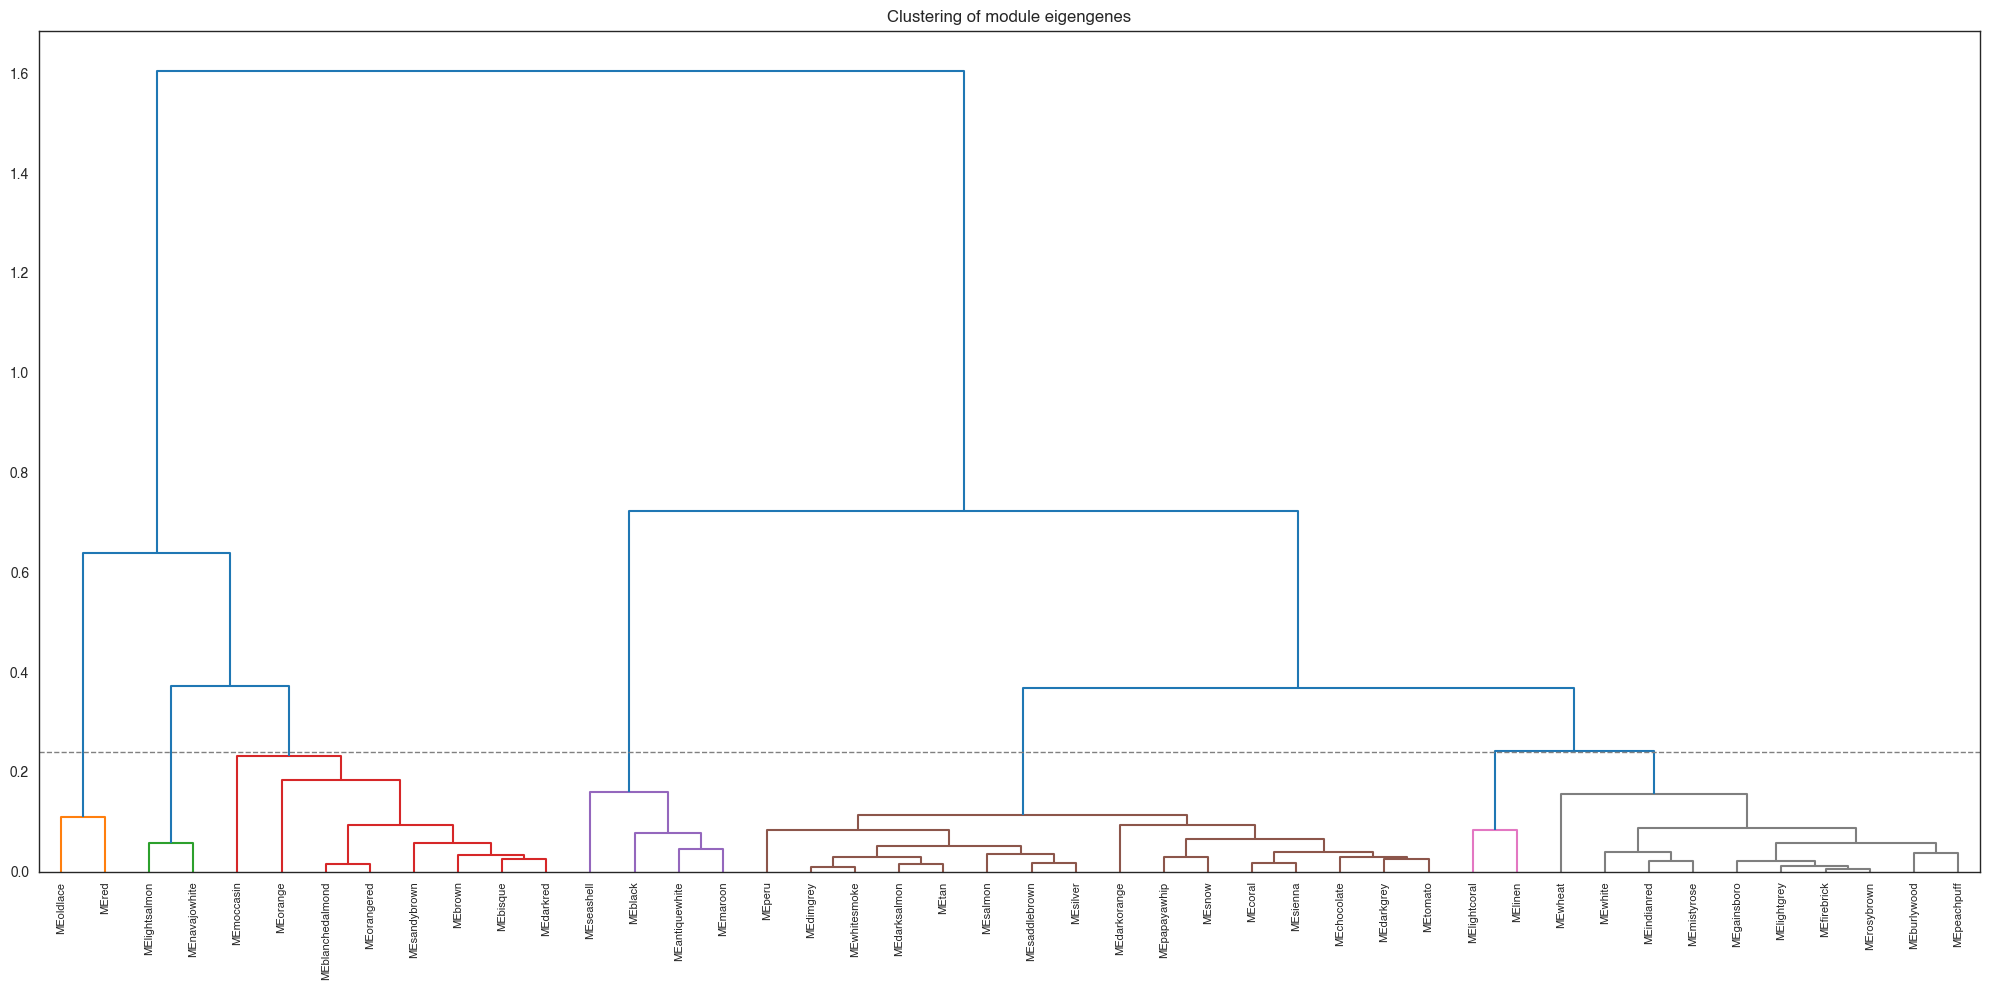

In [65]:
pyWGCNA.findModules()

In [66]:
pyWGCNA.updateGeneInfo(geneInfo)

In [67]:
# Get modules
modules = pyWGCNA.datExpr.var.moduleColors.unique().tolist()

In [68]:
modules

['moccasin', 'lightcoral', 'black', 'oldlace', 'lightsalmon']

In [69]:
# Save WGCNA object    
pyWGCNA.saveWGCNA()

Saving WGCNA as SLE.p


In [77]:
pyWGCNA.setMetadataColor('group', cmap='tab20')

moccasin = pyWGCNA.top_n_hub_genes(moduleName="moccasin", n=1000)
lightcoral = pyWGCNA.top_n_hub_genes(moduleName="lightcoral", n=1000)
black = pyWGCNA.top_n_hub_genes(moduleName="black", n=1000)
oldlace = pyWGCNA.top_n_hub_genes(moduleName="oldlace", n=1000)
lightsalmon = pyWGCNA.top_n_hub_genes(moduleName="lightsalmon", n=1000)


calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..



In [79]:
moccasin['gene_name'].to_csv('../../data/SLE/WGCNA/moccasin.txt', index=False, header=False)
lightcoral['gene_name'].to_csv('../../data/SLE/WGCNA/lightcoral.txt', index=False, header=False)
black['gene_name'].to_csv('../../data/SLE/WGCNA/black.txt', index=False, header=False)
oldlace['gene_name'].to_csv('../../data/SLE/WGCNA/oldlace.txt', index=False, header=False)
lightsalmon['gene_name'].to_csv('../../data/SLE/WGCNA/lightsalmon.txt', index=False, header=False)